Nama  : Muhammad Fillah Alfatih\
NIM   : J0403221151\
Kelas : TPL BP1

In [ ]:
from google.colab import drive
import sys
import os
drive.mount('/content/gdrive')
drivePath = ('/content/gdrive/My Drive/DataViskom')
sys.path.append(drivePath)
os.chdir(drivePath)
current_dir = os.getcwd()
current_dir

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
df = pd.read_table('household_power_consumption.txt', sep=';')
df.head()

Date      Time Global_active_power Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00               4.216                 0.418  234.840   
1  16/12/2006  17:25:00               5.360                 0.436  233.630   
2  16/12/2006  17:26:00               5.374                 0.498  233.290   
3  16/12/2006  17:27:00               5.388                 0.502  233.740   
4  16/12/2006  17:28:00               3.666                 0.528  235.680   
5  16/12/2006  17:29:00               3.520                 0.522  235.020   
6  16/12/2006  17:30:00               3.702                 0.520  235.090   
7  16/12/2006  17:31:00               3.700                 0.520  235.220   
8  16/12/2006  17:32:00               3.668                 0.510  233.990   
9  16/12/2006  17:33:00               3.662                 0.510  233.860   

  Global_intensity Sub_metering_1 Sub_metering_2  Sub_metering_3  
0           18.400          0.000          1.000            17.0  
1           23.000          0.000          1.000            16.0  
2           23.000          0.000          2.000            17.0  
3           23.000          0.000          1.000            17.0  
4           15.800          0.000          1.000            17.0  
5           15.000          0.000          2.000            17.0  
6           15.800          0.000          1.000            17.0  
7           15.800          0.000          1.000            17.0  
8           15.800          0.000          1.000            17.0  
9           15.800          0.000          2.000            16.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
# Hapus date dan time
df.drop(['Date', 'Time'], axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 110.8+ MB


In [ ]:
df['Global_active_power'].unique()

array(['4.216', '5.360', '5.374', ..., 4.068, 3.94, 3.74], dtype=object)

In [ ]:
df['Global_active_power'] = df['Global_active_power'].str.replace('"', '').str.strip()

df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')

print(df.dtypes)

Global_active_power      float64
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


In [ ]:
df['Global_reactive_power'].unique()

array(['0.418', '0.436', '0.498', '0.502', '0.528', '0.522', '0.520',
       '0.510', '0.470', '0.478', '0.398', '0.422', '0.282', '0.152',
       '0.156', '0.000', '0.076', '0.090', '0.200', '0.058', '0.180',
       '0.144', '0.118', '0.108', '0.202', '0.192', '0.186', '0.116',
       '0.136', '0.148', '0.160', '0.158', '0.100', '0.082', '0.050',
       '0.052', '0.162', '0.086', '0.048', '0.054', '0.068', '0.166',
       '0.174', '0.178', '0.188', '0.088', '0.080', '0.070', '0.084',
       '0.074', '0.106', '0.092', '0.064', '0.046', '0.138', '0.134',
       '0.132', '0.120', '0.130', '0.154', '0.078', '0.142', '0.140',
       '0.146', '0.150', '0.170', '0.102', '0.072', '0.060', '0.056',
       '0.062', '0.112', '0.066', '0.172', '0.168', '0.194', '0.184',
       '0.096', '0.164', '0.182', '0.094', '0.098', '0.176', '0.190',
       '0.204', '0.220', '0.198', '0.208', '0.244', '0.334', '0.298',
       '0.296', '0.286', '0.278', '0.104', '0.258', '0.238', '0.256',
       '0.214', '0.2

In [ ]:
df['Voltage'].unique()

array(['234.840', '233.630', '233.290', ..., 228.57, 229.09, 230.31],
      dtype=object)

In [ ]:
df['Voltage'] = df['Voltage'].str.replace('"', '').str.strip()

df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')

# show result
print(df.dtypes)

Global_active_power      float64
Global_reactive_power     object
Voltage                  float64
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


In [ ]:
df['Global_intensity'].unique()

array(['18.400', '23.000', '15.800', '15.000', '19.600', '23.200',
       '22.400', '22.600', '17.600', '14.200', '13.800', '14.400',
       '16.400', '25.400', '33.200', '30.600', '22.000', '19.400',
       '13.600', '13.400', '11.600', '19.200', '10.400', '11.800',
       '11.000', '21.000', '26.200', '29.000', '27.800', '27.000',
       '19.000', '9.600', '10.000', '21.400', '17.800', '12.000',
       '12.400', '15.200', '20.800', '15.600', '26.400', '18.800',
       '13.000', '9.800', '9.200', '13.200', '18.000', '10.800', '10.600',
       '18.200', '17.000', '17.400', '14.800', '14.600', '15.400',
       '14.000', '8.400', '9.400', '7.800', '8.200', '8.600', '11.400',
       '12.600', '9.000', '7.600', '12.800', '7.400', '5.600', '4.600',
       '7.200', '1.600', '2.400', '2.800', '1.200', '4.400', '4.000',
       '10.200', '6.800', '5.200', '6.000', '6.600', '8.000', '2.000',
       '4.800', '5.400', '16.600', '3.000', '1.800', '8.800', '1.400',
       '21.800', '20.200', '16.000

In [ ]:
df['Global_intensity'] = df['Global_intensity'].str.replace('"', '').str.strip()  # menambahkan '' sebagai string pengganti

df['Global_intensity'] = pd.to_numeric(df['Global_intensity'], errors='coerce')

print(df.dtypes)

Global_active_power      float64
Global_reactive_power     object
Voltage                  float64
Global_intensity         float64
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


In [ ]:
df['Sub_metering_1'].unique()

array(['0.000', '1.000', '2.000', '6.000', '37.000', '36.000', '38.000',
       '25.000', '12.000', '11.000', '9.000', '4.000', '33.000', '5.000',
       '34.000', '8.000', '26.000', '27.000', '15.000', '20.000',
       '21.000', '23.000', '16.000', '10.000', '39.000', '32.000', '?',
       '19.000', '35.000', '30.000', '40.000', '7.000', '31.000',
       '17.000', '3.000', '29.000', '24.000', '14.000', '41.000',
       '53.000', '76.000', '75.000', '77.000', '74.000', '28.000',
       '68.000', '58.000', '62.000', '13.000', '18.000', '22.000',
       '64.000', '71.000', '56.000', '72.000', '45.000', '42.000',
       '59.000', '66.000', '43.000', '44.000', '48.000', '46.000',
       '73.000', '55.000', '60.000', '70.000', '63.000', '67.000',
       '47.000', '65.000', '51.000', '50.000', '69.000', '78.000',
       '57.000', '49.000', '61.000', '52.000', '54.000', '79.000',
       '80.000', '81.000', '82.000', '83.000', '84.000', '88.000',
       '86.000', '87.000', 0.0, 1.0, 2.0, 40.0,

In [ ]:
df['Sub_metering_1'] = df['Sub_metering_1'].str.replace('"', '').str.strip()  # menambahkan '' sebagai string pengganti

df['Sub_metering_1'] = pd.to_numeric(df['Sub_metering_1'], errors='coerce')

print(df.dtypes)

Global_active_power      float64
Global_reactive_power     object
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2            object
Sub_metering_3           float64
dtype: object


In [ ]:
df['Sub_metering_2'].unique()

array(['1.000', '2.000', '0.000', '16.000', '37.000', '36.000', '22.000',
       '12.000', '27.000', '20.000', '9.000', '4.000', '3.000', '5.000',
       '13.000', '35.000', '28.000', '26.000', '24.000', '21.000',
       '17.000', '33.000', '25.000', '23.000', '18.000', '30.000',
       '31.000', '7.000', '38.000', '29.000', '50.000', '71.000',
       '59.000', '62.000', '70.000', '40.000', '34.000', '8.000',
       '15.000', '6.000', '32.000', '19.000', '14.000', '49.000',
       '72.000', '73.000', '61.000', '39.000', '42.000', '10.000',
       '56.000', '11.000', '?', '43.000', '67.000', '63.000', '53.000',
       '65.000', '52.000', '69.000', '48.000', '74.000', '41.000',
       '47.000', '58.000', '68.000', '64.000', '75.000', '46.000',
       '57.000', '60.000', '66.000', '44.000', '78.000', '77.000',
       '76.000', '51.000', '55.000', '45.000', '54.000', '79.000',
       '80.000', 0.0, 1.0, 2.0, 36.0, 40.0, 39.0, 41.0, 23.0, 10.0, 6.0,
       5.0, 18.0, 37.0, 28.0, 38.0, 9.0, 

In [ ]:
df['Sub_metering_2'] = df['Sub_metering_2'].str.replace('"', '').str.strip()  # menambahkan '' sebagai string pengganti

df['Sub_metering_2'] = pd.to_numeric(df['Sub_metering_2'], errors='coerce')

print(df.dtypes)

Global_active_power      float64
Global_reactive_power     object
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object


In [ ]:
print("missing value:")
print(df.isnull().sum())

missing value:
Global_active_power      69622
Global_reactive_power        0
Voltage                  69622
Global_intensity         69622
Sub_metering_1           69622
Sub_metering_2           69622
Sub_metering_3           25979
dtype: int64


In [ ]:
# Cek duplikasi data
print("duplikasi data:")
print(df.duplicated().sum())

duplikasi data:
207716


In [ ]:
df

Global_active_power Global_reactive_power  Voltage  Global_intensity  \
0                      4.216                 0.418   234.84              18.4   
1                      5.360                 0.436   233.63              23.0   
2                      5.374                 0.498   233.29              23.0   
3                      5.388                 0.502   233.74              23.0   
4                      3.666                 0.528   235.68              15.8   
...                      ...                   ...      ...               ...   
2075254                  NaN                   0.0      NaN               NaN   
2075255                  NaN                   0.0      NaN               NaN   
2075256                  NaN                   0.0      NaN               NaN   
2075257                  NaN                   0.0      NaN               NaN   
2075258                  NaN                   0.0      NaN               NaN   

         Sub_metering_1  Sub_metering_2  Sub_metering_3  
0                   0.0             1.0            17.0  
1                   0.0             1.0            16.0  
2                   0.0             2.0            17.0  
3                   0.0             1.0            17.0  
4                   0.0             1.0            17.0  
...                 ...             ...             ...  
2075254             NaN             NaN             0.0  
2075255             NaN             NaN             0.0  
2075256             NaN             NaN             0.0  
2075257             NaN             NaN             0.0  
2075258             NaN             NaN             0.0  

[2075259 rows x 7 columns]

In [ ]:
# Hapus baris dengan nilai yang hilang
df.dropna(inplace=True)

In [ ]:
# Hapus duplikasi
df.drop_duplicates(inplace=True)

In [ ]:
# Penanganan missing value
print("missing value:")
print(df.isnull().sum())

# Cek duplikasi data
print("duplikasi data:")
print(df.duplicated().sum())

missing value:
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64
duplikasi data:
0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1865278 entries, 0 to 2031615
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  object 
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(6), object(1)
memory usage: 113.8+ MB


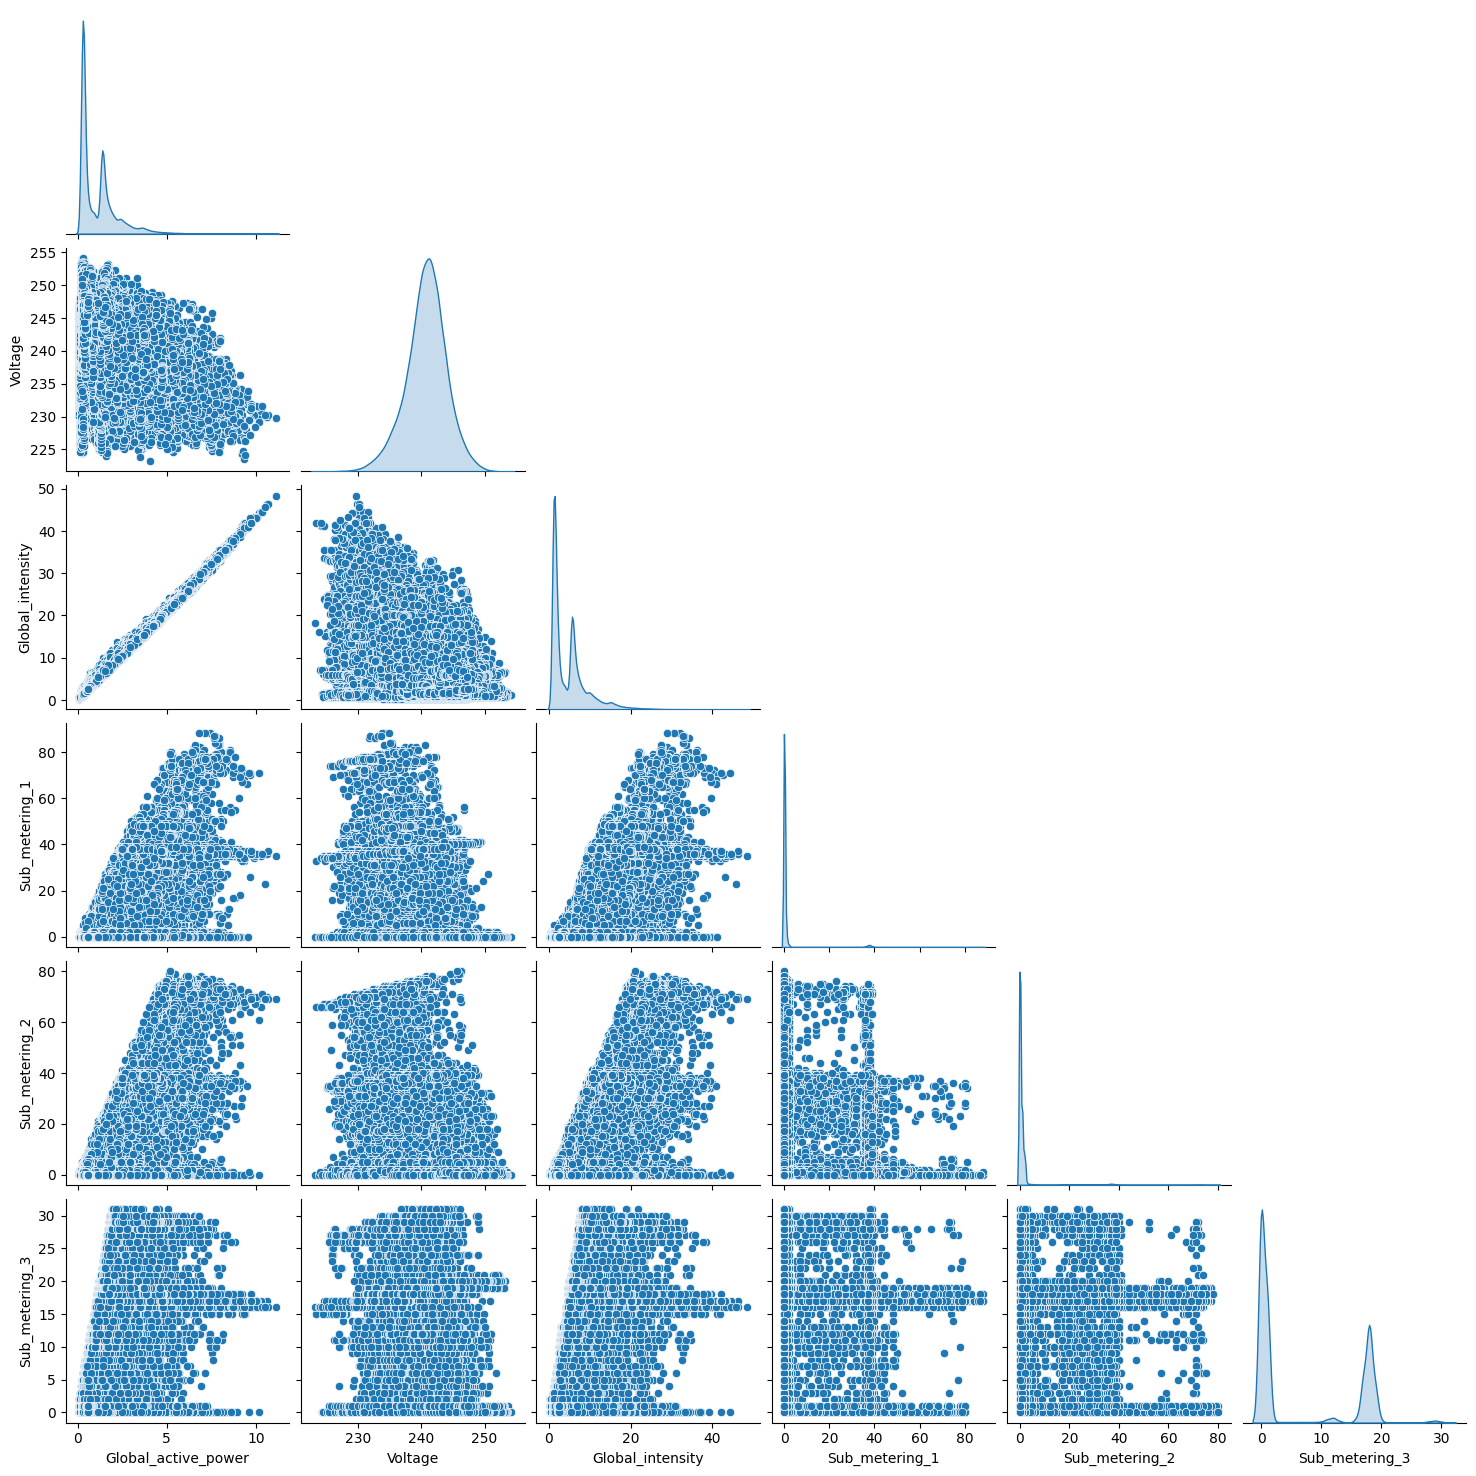

In [ ]:
sns.pairplot(df,corner=True,diag_kind='kde')
plt.show()

In [ ]:
df.head()

Global_active_power Global_reactive_power  Voltage  Global_intensity  \
0                4.216                 0.418   234.84              18.4   
1                5.360                 0.436   233.63              23.0   
2                5.374                 0.498   233.29              23.0   
3                5.388                 0.502   233.74              23.0   
4                3.666                 0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  
0             0.0             1.0            17.0  
1             0.0             1.0            16.0  
2             0.0             2.0            17.0  
3             0.0             1.0            17.0  
4             0.0             1.0            17.0

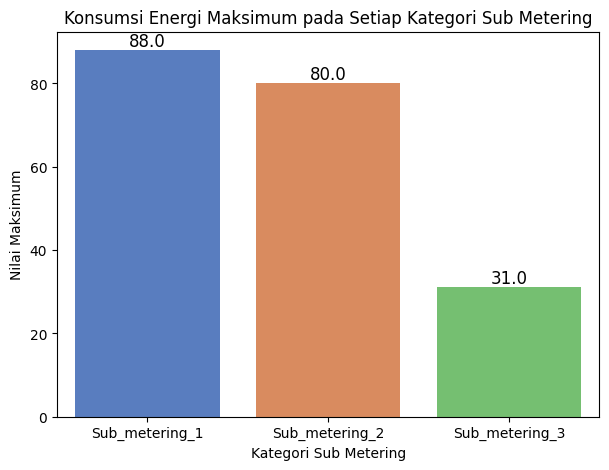

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

max_values = {
    "Sub_metering_1": df["Sub_metering_1"].max(),
    "Sub_metering_2": df["Sub_metering_2"].max(),
    "Sub_metering_3": df["Sub_metering_3"].max() 
}

# Membuat bar chart
plt.figure(figsize=(7,5))
ax = sns.barplot(x=list(max_values.keys()), y=list(max_values.values()), palette="muted")

for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12)

# Menambahkan label untuk sumbu X dan Y serta judul grafik
plt.xlabel("Kategori Sub Metering")
plt.ylabel("Nilai Maksimum")
plt.title("Konsumsi Energi Maksimum pada Setiap Kategori Sub Metering")

plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Membuat histogram
sns.histplot(df['Voltage'], kde=True, color='blue', bins=30)  # 'bins' bisa disesuaikan sesuai kebutuhan

# Menambahkan label dan judul grafik
plt.xlabel('Voltage (V)')
plt.ylabel('Frekuensi')
plt.title('Distribusi Penggunaan Listrik Berdasarkan Voltage')

plt.show()

In [ ]:
df.describe()

Global_active_power       Voltage  Global_intensity  Sub_metering_1  \
count         1.865278e+06  1.865278e+06      1.865278e+06    1.865278e+06   
mean          1.147987e+00  2.407450e+02      4.869764e+00    1.204256e+00   
std           1.071512e+00  3.242181e+00      4.500438e+00    6.370201e+00   
min           7.600000e-02  2.232000e+02      2.000000e-01    0.000000e+00   
25%           3.260000e-01  2.388800e+02      1.400000e+00    0.000000e+00   
50%           7.380000e-01  2.409100e+02      3.200000e+00    0.000000e+00   
75%           1.574000e+00  2.428000e+02      6.600000e+00    0.000000e+00   
max           1.112200e+01  2.541500e+02      4.840000e+01    8.800000e+01   

       Sub_metering_2  Sub_metering_3  
count    1.865278e+06    1.865278e+06  
mean     1.399404e+00    6.804970e+00  
std      6.035473e+00    8.541671e+00  
min      0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  
50%      0.000000e+00    1.000000e+00  
75%      1.000000e+00    1.800000e+01  
max      8.000000e+01    3.100000e+01

In [ ]:
# Melakukan normalisasi data
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [ ]:
df.head()

Global_active_power  Global_reactive_power   Voltage  Global_intensity  \
0             2.863258               2.547131 -1.821292          3.006427   
1             3.930908               2.707437 -2.194498          4.028550   
2             3.943974               3.259603 -2.299366          4.028550   
3             3.957040               3.295227 -2.160570          4.028550   
4             2.349964               3.526781 -1.562207          2.428706   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  
0       -0.189045       -0.066176        1.193564  
1       -0.189045       -0.066176        1.076491  
2       -0.189045        0.099511        1.193564  
3       -0.189045       -0.066176        1.193564  
4       -0.189045       -0.066176        1.193564

In [ ]:
# Memeriksa korelasi antar fitur
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Berdasarkan analisis korelasi data, Sub_metering_3 menunjukkan hubungan paling signifikan dengan Global_active_power dan Global_intensity, dengan nilai korelasi masing-masing sebesar 0.63 dan 0.61. Hal ini menunjukkan bahwa Sub_metering_3 memiliki peran besar dalam merepresentasikan total konsumsi listrik, melebihi Sub_metering_1 dan Sub_metering_2 yang memiliki korelasi lebih rendah terhadap daya aktif dan intensitas. Oleh karena itu, Sub_metering_3 dapat dianggap sebagai indikator utama dalam menggambarkan penggunaan daya secara keseluruhan dalam dataset ini. Dengan demikian, menitikberatkan analisis pada Sub_metering_3 akan memberikan pemahaman yang lebih akurat mengenai pola konsumsi listrik tertinggi.

### Elbow Method

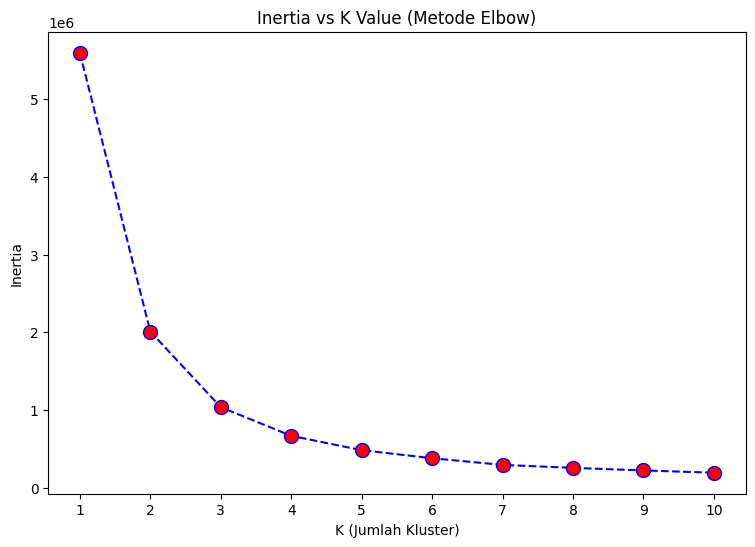

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Memilih kolom yang relevan untuk analisis
df_subset = df[['Global_active_power', 'Global_intensity', 'Sub_metering_3']]

inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df_subset)
    inertia_list.append(kmeans.inertia_)

# Visualisasi dengan Metode Elbow
plt.figure(figsize=(9,6))
plt.plot(range(1, 11), inertia_list, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Inertia vs K Value (Metode Elbow)')
plt.xticks(range(1, 11, 1))
plt.xlabel('K (Jumlah Kluster)')
plt.ylabel('Inertia')
plt.show()


### Silhouette Score

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df_limited = df_subset.sample(n=min(10000, len(df_subset)), random_state=42)

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_limited)
    silhouette_scores.append(silhouette_score(df_limited, labels))

# Visualisasi Skor Silhouette
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, color='pink', linestyle='dashed',
         marker='o', markerfacecolor='red', markersize=10)
plt.title('Silhouette Score vs K Value')
plt.xlabel('K (Jumlah Kluster)')
plt.ylabel('Silhouette Score')
plt.show()


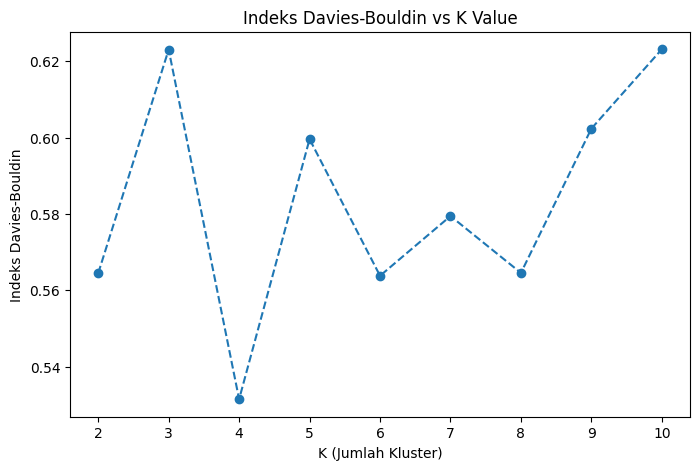

In [ ]:
from sklearn.metrics import davies_bouldin_score

dbi_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_subset)
    dbi = davies_bouldin_score(df_subset, labels)
    dbi_scores.append(dbi)

# Visualisasi Indeks Davies-Bouldin
plt.figure(figsize=(8,5))
plt.plot(range(2, 11), dbi_scores, marker='o', linestyle='--')
plt.xlabel('K (Jumlah Kluster)')
plt.ylabel('Indeks Davies-Bouldin')
plt.title('Indeks Davies-Bouldin vs K Value')
plt.show()


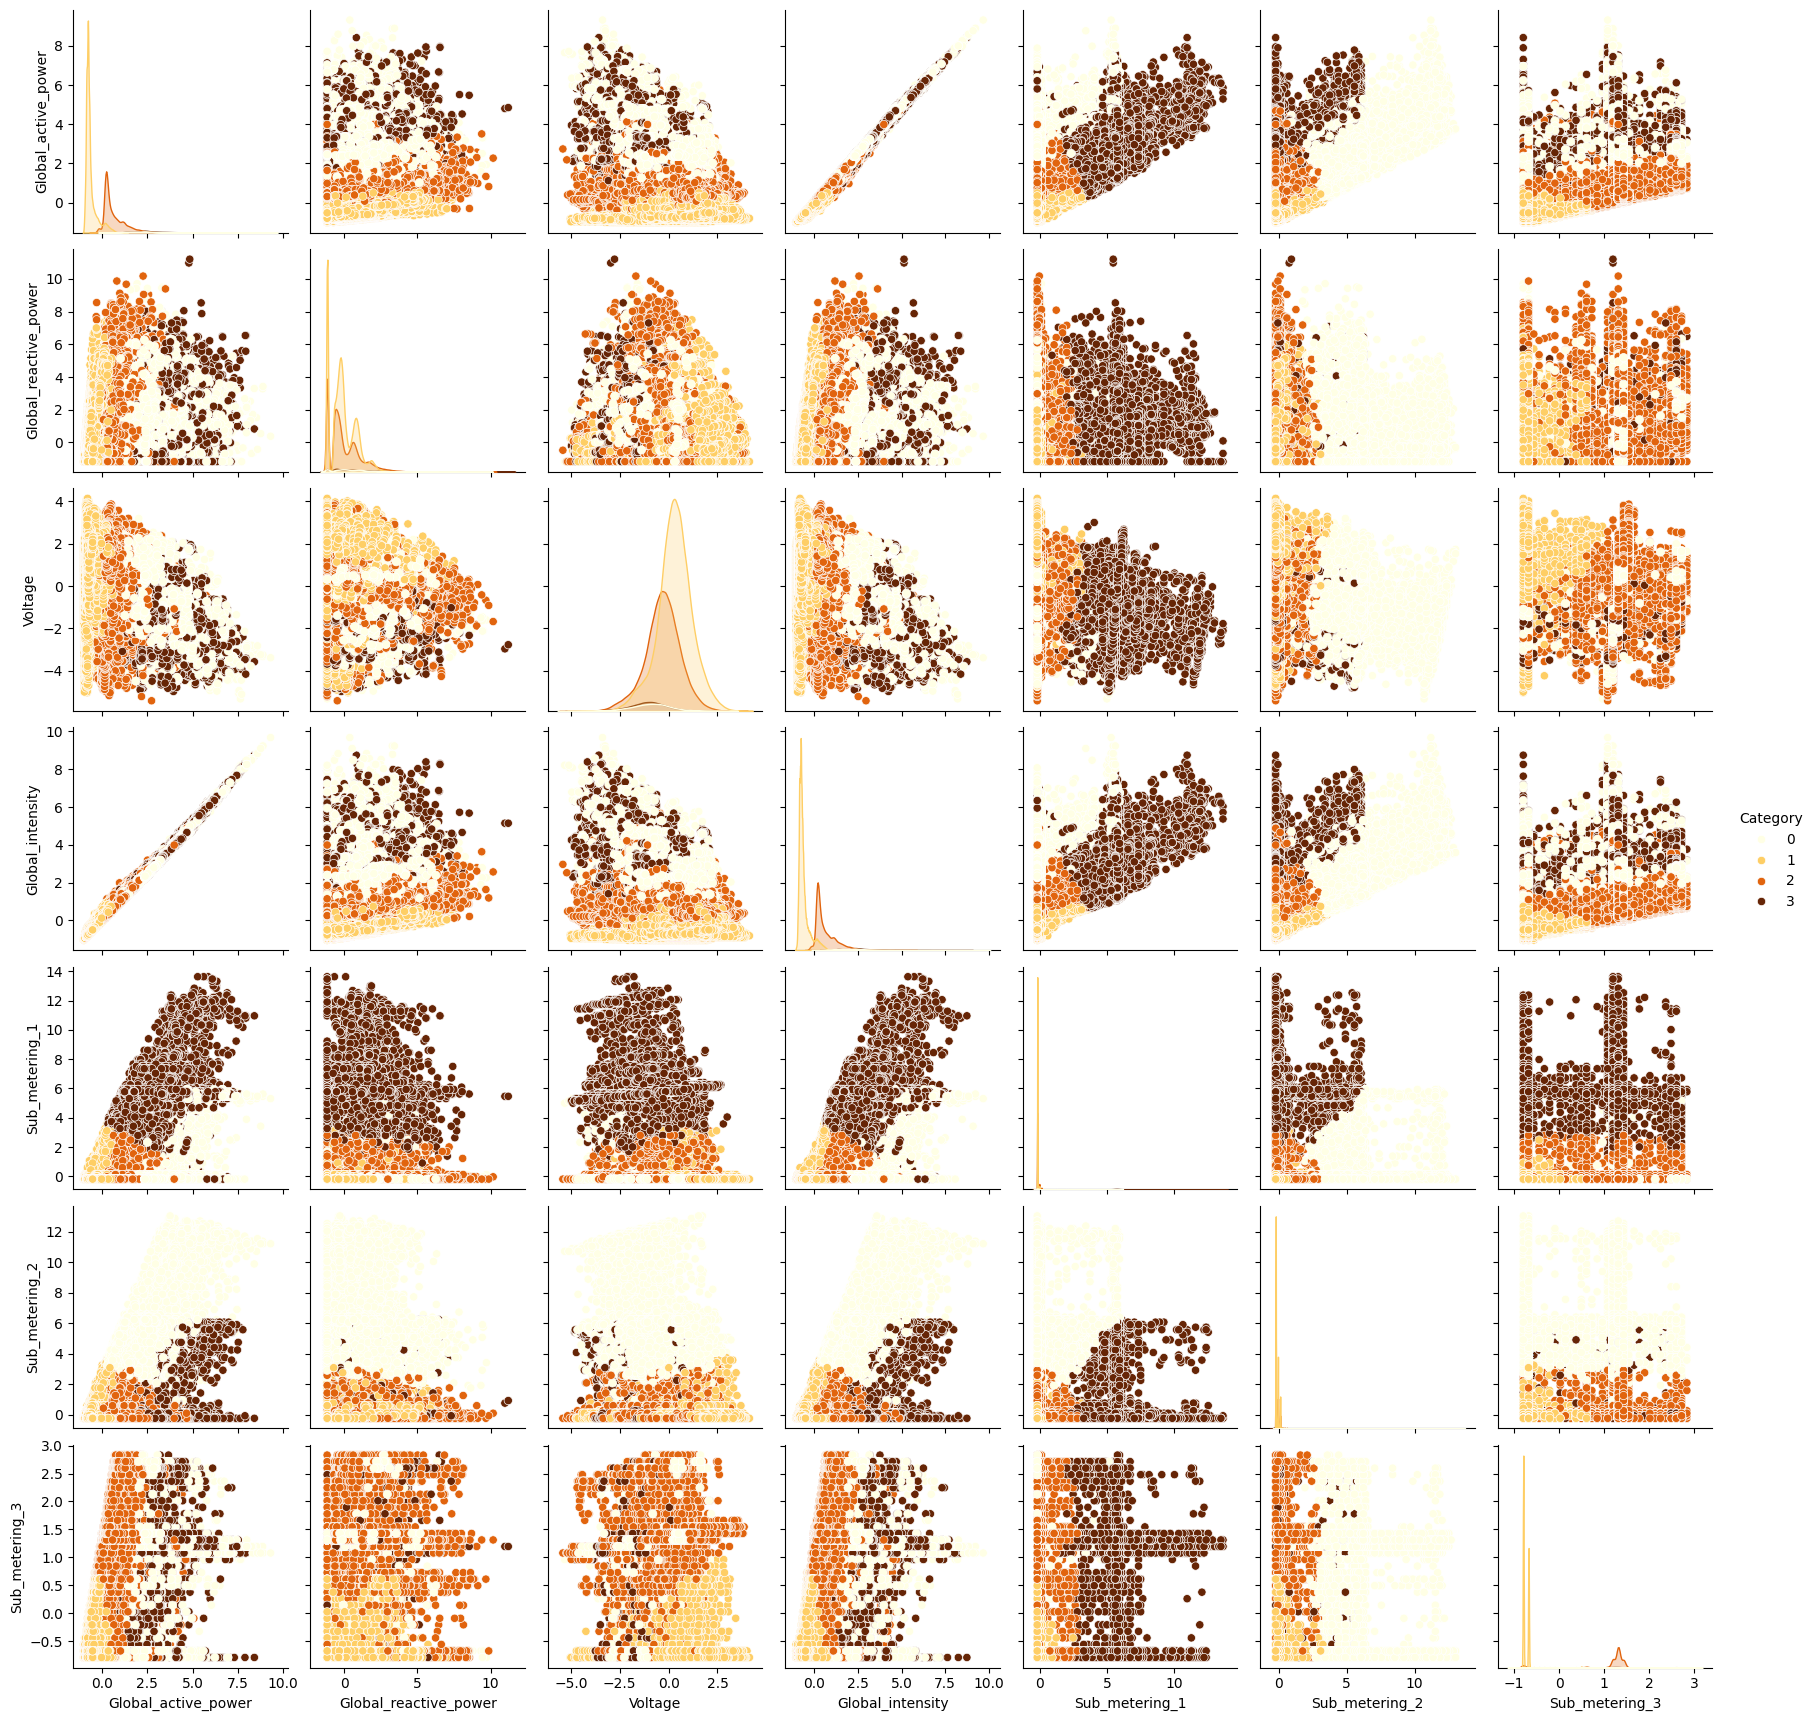

In [ ]:
km = KMeans(n_clusters=4, random_state=42, n_init=10).fit(df)
df["Category"] = km.labels_
sns.pairplot(data=df, hue="Category", palette="YlOrBr")